<a href="https://colab.research.google.com/github/ch-aitali/assignments/blob/main/P104_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Importing the Data

In [2]:
inf_rate = pd.read_csv('/content/INDIA INFLATION RATE.csv')
inf_rate

,Year,Inflation Rate (%),Annual Change
0,2020,6.62%,2.90%
1,2019,3.72%,-0.22%
2,2018,3.95%,0.62%
3,2017,3.33%,-1.62%
4,2016,4.95%,0.04%
...,...,...,...
56,1964,13.36%,10.41%
57,1963,2.95%,-0.69%
58,1962,3.63%,1.94%
59,1961,1.70%,-0.08%


## 3. Data Understanding

In [3]:
inf_rate.shape

(61, 3)

In [4]:
inf_rate.dtypes

Year                   int64
Inflation Rate (%)    object
Annual Change         object
dtype: object

In [5]:
inf_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                61 non-null     int64 
 1   Inflation Rate (%)  61 non-null     object
 2   Annual Change       61 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [6]:
inf_rate.describe(include='all')

,Year,Inflation Rate (%),Annual Change
count,61.000000,61,61
unique,NaN,61,59
top,NaN,6.62%,-0.08%
freq,NaN,1,2
mean,1990.000000,NaN,NaN
std,17.752934,NaN,NaN
min,1960.000000,NaN,NaN
25%,1975.000000,NaN,NaN
50%,1990.000000,NaN,NaN
75%,2005.000000,NaN,NaN


## 4. Data Cleaning

In [7]:
inf_rate.rename(columns={'Inflation Rate (%)':'Inflation_Rate(%)','Annual Change':'Annual_Change(%)'},inplace=True)

In [8]:
inf_rate['Inflation_Rate(%)'].replace("%", ' ', regex=True, inplace=True)
inf_rate['Annual_Change(%)'].replace("%", ' ', regex=True, inplace=True)

In [9]:
inf_rate

,Year,Inflation_Rate(%),Annual_Change(%)
0,2020,6.62,2.90
1,2019,3.72,-0.22
2,2018,3.95,0.62
3,2017,3.33,-1.62
4,2016,4.95,0.04
...,...,...,...
56,1964,13.36,10.41
57,1963,2.95,-0.69
58,1962,3.63,1.94
59,1961,1.70,-0.08


In [10]:
inf_rate['Inflation_Rate(%)']=inf_rate['Inflation_Rate(%)'].astype(float)
inf_rate['Annual_Change(%)']=inf_rate['Annual_Change(%)'].astype(float)


In [11]:
inf_rate.dtypes

Year                   int64
Inflation_Rate(%)    float64
Annual_Change(%)     float64
dtype: object

## 5. Data Visualization

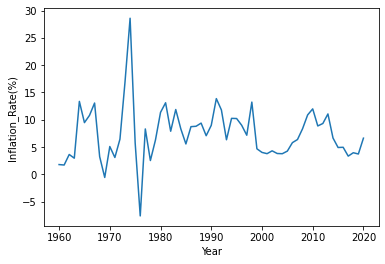

In [12]:
sns.lineplot(data=inf_rate, x="Year", y="Inflation_Rate(%)")

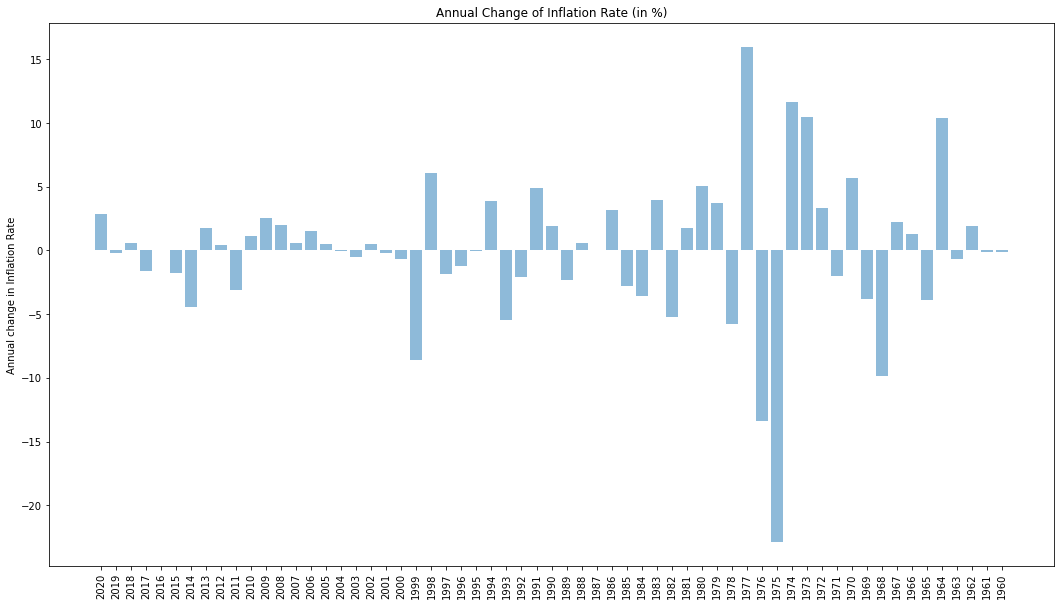

In [13]:
plt.figure(figsize=(18,10))
x = inf_rate['Year']
x_pos = np.arange(len(x))
y = inf_rate['Annual_Change(%)']

plt.bar(x_pos, y, align='center', alpha=0.5)
plt.xticks(x_pos, x, rotation = 90)
plt.ylabel('Annual change in Inflation Rate')
plt.title('Annual Change of Inflation Rate (in %)')
plt.show()

In [14]:
#Setting the year as index
inf_rate = inf_rate.set_index('Year')
inf_rate.index

Int64Index([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
            2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
            1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 1989, 1988,
            1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
            1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
            1965, 1964, 1963, 1962, 1961, 1960],
           dtype='int64', name='Year')

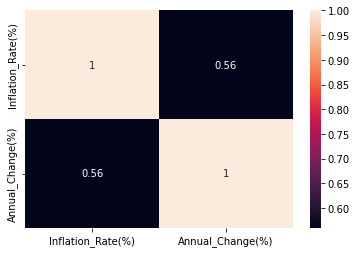

In [15]:
inf_rate.corr()
sns.heatmap(inf_rate.corr(),annot=True)
plt.show()

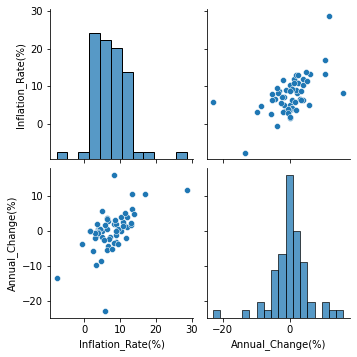

In [16]:
sns.pairplot(inf_rate)


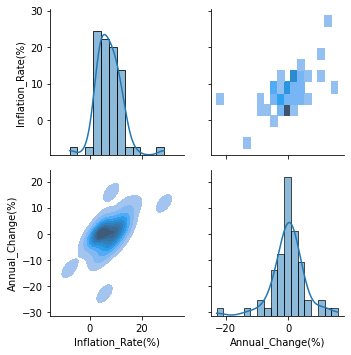

In [17]:
g = sns.PairGrid(inf_rate)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)


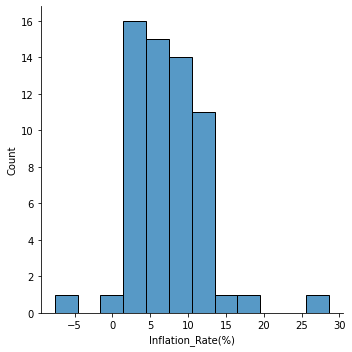

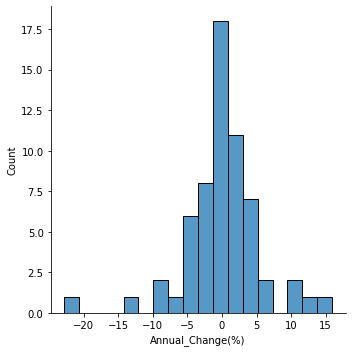

In [18]:
sns.displot(inf_rate, x="Inflation_Rate(%)")
sns.displot(inf_rate, x="Annual_Change(%)")

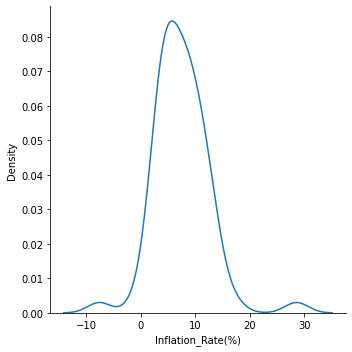

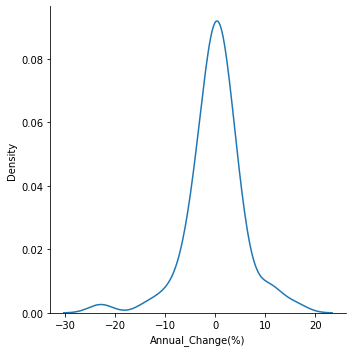

In [19]:
#Kernel density estimation
sns.displot(inf_rate, x="Inflation_Rate(%)", kind="kde")

sns.displot(inf_rate, x="Annual_Change(%)", kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


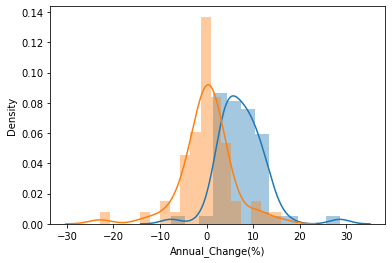

In [20]:
sns.distplot(inf_rate["Inflation_Rate(%)"])
sns.distplot(inf_rate["Annual_Change(%)"])

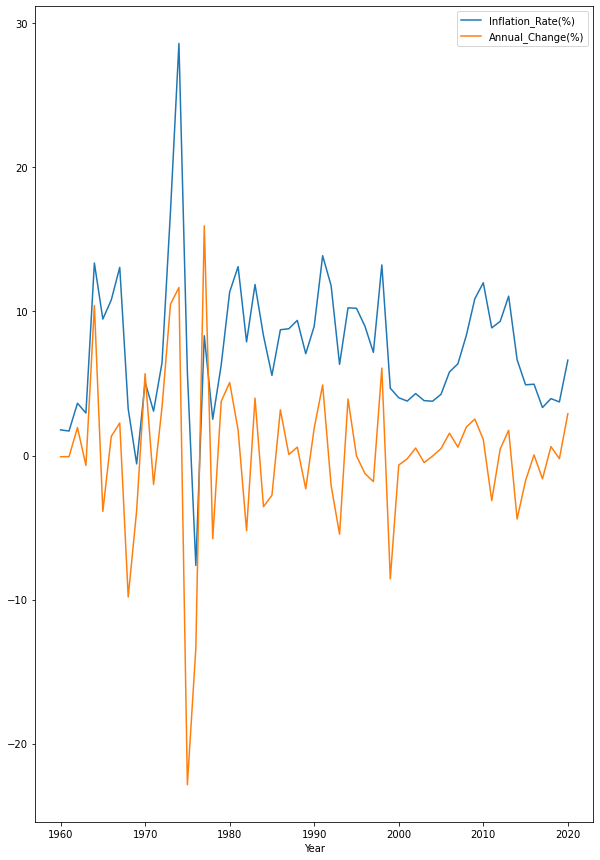

In [21]:
inf_rate.plot(figsize = (10,15))

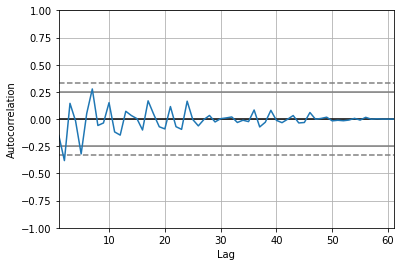

In [22]:
autocorrelation_plot(inf_rate['Annual_Change(%)'])

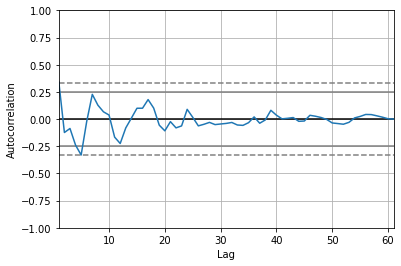

In [23]:
autocorrelation_plot(inf_rate['Inflation_Rate(%)'])

* Autocorrelation, also known as serial correlation, refers to the degree of correlation of the same variables between two successive time intervals.
* The value of autocorrelation ranges from -1 to 1. A value between -1 and 0 represents negative autocorrelation. A value between 0 and 1 represents positive autocorrelation.
* Autocorrelation gives information about the trend of a set of historical data, so it can be useful in the technical analysis for the equity market.

###### Autocorrelation and Partial Autocorrelation Plot: (ACF&PACF)
These are important plots for time series. They graphically summarize the strength of the relationships of observations in time series.
###### Autocorrelation Plot:
In Autocorrelation, we calculate the correlation for time-series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, hence are called a serial correlation or an autocorrelation.

The horizontal axis of an autocorrelation plot shows the size of the lag between the elements of the time series. In simple terms, The ‘kth’ lag is the time period that happened “k” time points before the time I. You can optionally set in how many lags you want to observe.

The Autocorrelation Plot is used in a forecasting model for time series called Moving Averages

###### PartialAutocorrelation Plot:
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. Meaning… The effects of the lags in between are removed and we can see the direct impact a previous observation has on the value to be predicted at a time(t).

PACF can be computed by regression.

Regression is a statistical method to determine the strength and character of the relationship between one dependant value and other variables that are independent.

The PACF plot is used in the AutoRegressive Model for forecasting


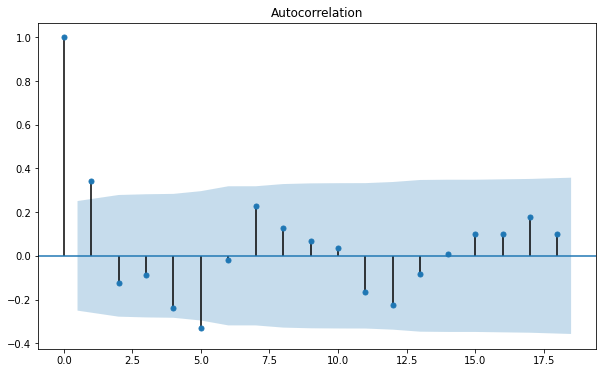

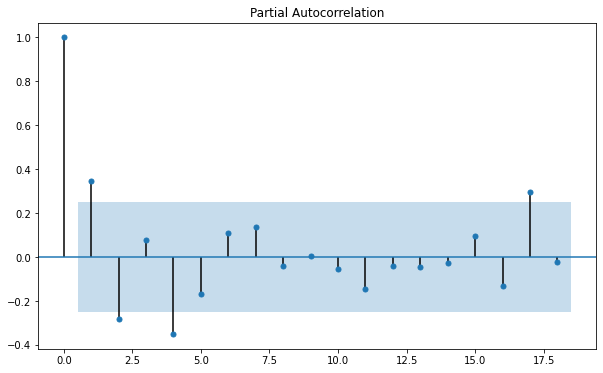

In [24]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(inf_rate['Inflation_Rate(%)']);
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(inf_rate['Inflation_Rate(%)']);

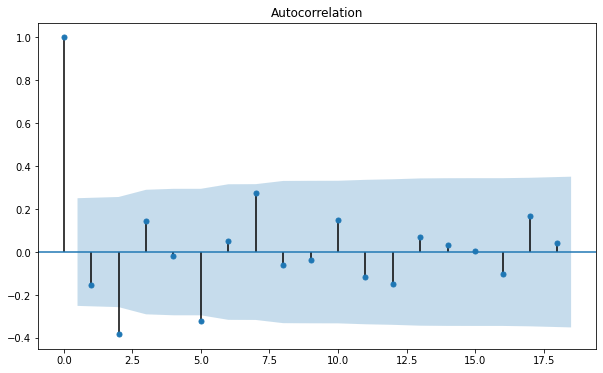

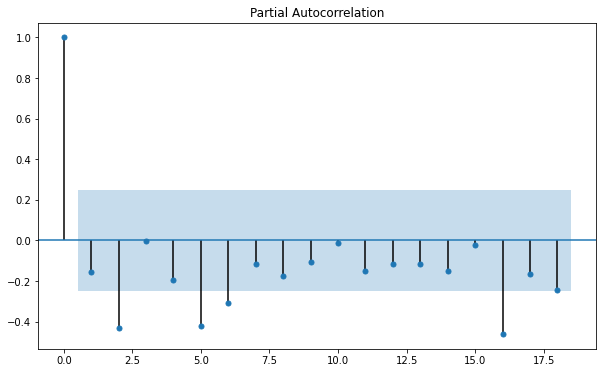

In [25]:
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_acf(inf_rate['Annual_Change(%)']);
plt.rc("figure", figsize=(10,6))
sm.graphics.tsa.plot_pacf(inf_rate['Annual_Change(%)']);

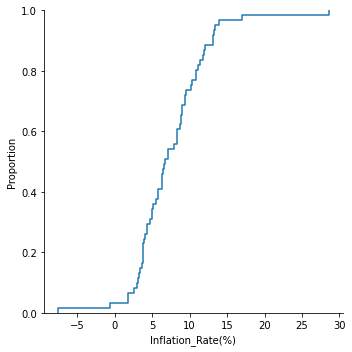

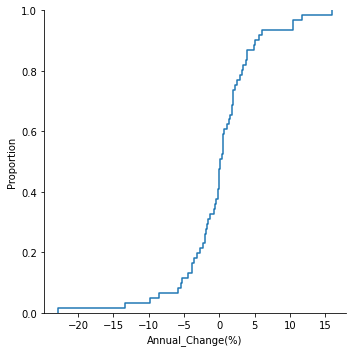

In [26]:
#Empirical cumulative distributions
sns.displot(inf_rate, x="Inflation_Rate(%)", kind="ecdf")
sns.displot(inf_rate, x="Annual_Change(%)", kind="ecdf")

In [ ]:
SPLITTING DATA

In [27]:
inf_rate

,Inflation_Rate(%),Annual_Change(%)
Year,,
2020,6.62,2.90
2019,3.72,-0.22
2018,3.95,0.62
2017,3.33,-1.62
2016,4.95,0.04
...,...,...
1964,13.36,10.41
1963,2.95,-0.69
1962,3.63,1.94


In [ ]:
#Train= inf_rate.head(51)
#Test= inf_rate.tail(10)
#Train


,Inflation_Rate(%),Annual_Change(%)
Year,,
2020,6.62,2.90
2019,3.72,-0.22
2018,3.95,0.62
2017,3.33,-1.62
2016,4.95,0.04
2015,4.91,-1.74
2014,6.65,-4.41
2013,11.06,1.75
2012,9.31,0.45


In [ ]:
#Test

,Inflation_Rate(%),Annual_Change(%)
Year,,
1969,-0.58,-3.82
1968,3.24,-9.82
1967,13.06,2.26
1966,10.80,1.33
1965,9.47,-3.88
1964,13.36,10.41
1963,2.95,-0.69
1962,3.63,1.94
1961,1.70,-0.08


In [41]:
inf_rate.drop("Annual_Change(%)",axis=1,inplace=True)


In [42]:
# separate out a validation dataset
split_point = len(inf_rate) - 10
dataset, validation = inf_rate[0:split_point], inf_rate[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 51, Validation 10


In [43]:
dataset

,Inflation_Rate(%)
Year,
2020,6.62
2019,3.72
2018,3.95
2017,3.33
2016,4.95
2015,4.91
2014,6.65
2013,11.06
2012,9.31


In [44]:
validation

,Inflation_Rate(%)
Year,
1969,-0.58
1968,3.24
1967,13.06
1966,10.80
1965,9.47
1964,13.36
1963,2.95
1962,3.63
1961,1.70


In [45]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
#X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [46]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.1f, Observed =%.1f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=9.0, Observed =10.2
>Predicted=10.2, Observed =10.2
>Predicted=10.2, Observed =6.3
>Predicted=6.3, Observed =11.8
>Predicted=11.8, Observed =13.9
>Predicted=13.9, Observed =9.0
>Predicted=9.0, Observed =7.1
>Predicted=7.1, Observed =9.4
>Predicted=9.4, Observed =8.8
>Predicted=8.8, Observed =8.7
>Predicted=8.7, Observed =5.6
>Predicted=5.6, Observed =8.3
>Predicted=8.3, Observed =11.9
>Predicted=11.9, Observed =7.9
>Predicted=7.9, Observed =13.1
>Predicted=13.1, Observed =11.3
>Predicted=11.3, Observed =6.3
>Predicted=6.3, Observed =2.5
>Predicted=2.5, Observed =8.3
>Predicted=8.3, Observed =-7.6
>Predicted=-7.6, Observed =5.8
>Predicted=5.8, Observed =28.6
>Predicted=28.6, Observed =16.9
>Predicted=16.9, Observed =6.4
>Predicted=6.4, Observed =3.1
>Predicted=3.1, Observed =5.1
RMSE: 7.470


In [48]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [49]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [51]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=6.251
ARIMA(0, 0, 1) RMSE=5.888
ARIMA(0, 0, 2) RMSE=6.551
ARIMA(0, 1, 0) RMSE=7.558
ARIMA(0, 1, 1) RMSE=7.043
ARIMA(0, 1, 2) RMSE=6.152
ARIMA(0, 1, 3) RMSE=7.000
ARIMA(0, 2, 0) RMSE=11.287
ARIMA(0, 2, 1) RMSE=7.806
ARIMA(1, 0, 0) RMSE=6.137
ARIMA(1, 1, 0) RMSE=8.252
ARIMA(1, 2, 0) RMSE=11.802
ARIMA(2, 0, 0) RMSE=6.668
ARIMA(2, 0, 1) RMSE=6.796
ARIMA(2, 1, 0) RMSE=7.750
ARIMA(2, 1, 1) RMSE=7.830
ARIMA(2, 2, 0) RMSE=10.201
ARIMA(2, 2, 1) RMSE=8.202
ARIMA(3, 0, 0) RMSE=6.873
ARIMA(3, 1, 0) RMSE=7.958
ARIMA(3, 1, 1) RMSE=7.939
ARIMA(3, 2, 0) RMSE=10.420
ARIMA(4, 0, 0) RMSE=6.894
ARIMA(4, 1, 0) RMSE=8.100
ARIMA(4, 1, 1) RMSE=7.623
Best ARIMA(0, 0, 1) RMSE=5.888


In [52]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [54]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

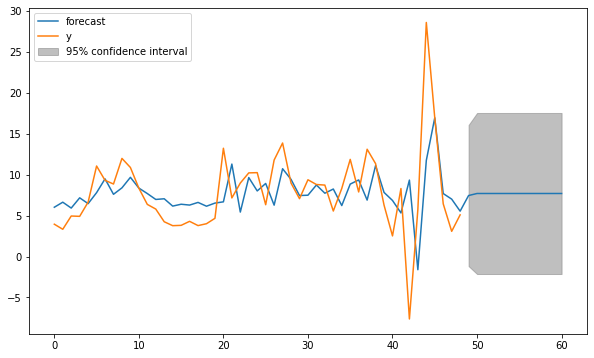

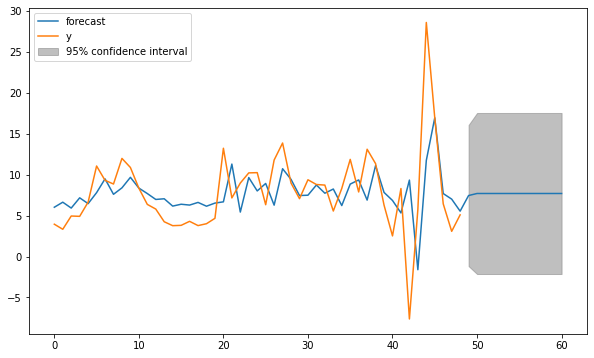

In [55]:
# fit model
model = ARIMA(X, order=(0,0,1))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 61)

In [56]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

5.178420436922927

In [57]:
# fit model
data = read_csv('/content/INDIA INFLATION RATE.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [58]:
model = ARIMA(X, order=(0,0,1))
model_fit = model.fit()

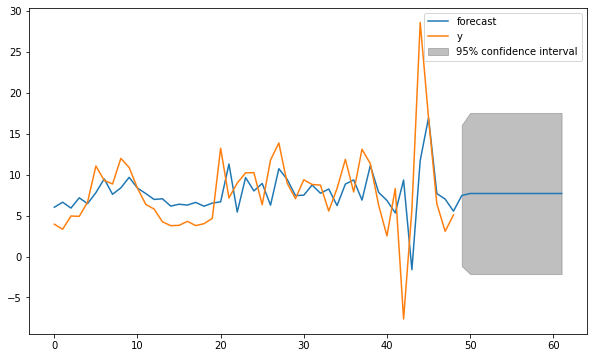

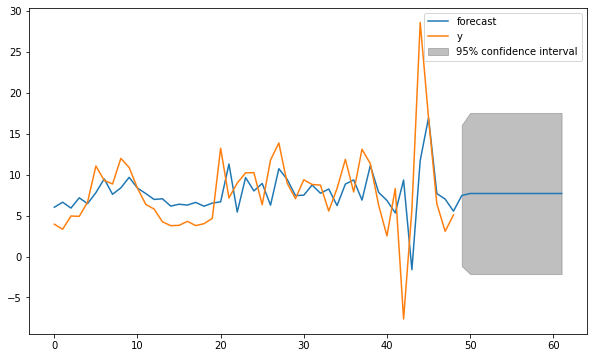

In [59]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,62)

In [60]:
forecast

array([7.45363849, 7.70254975, 7.70254975, 7.70254975, 7.70254975,
       7.70254975, 7.70254975, 7.70254975, 7.70254975, 7.70254975])